In [ ]:
from google.colab import files

files.upload()  # Upload kaggle.json manually


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syedmuhammadmehrands","key":"672cc378663a8717ca2082c47838f333"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia  # Replace with your dataset name


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:45<00:00, 19.3MB/s]
100% 2.29G/2.29G [01:45<00:00, 23.3MB/s]


In [ ]:
import zipfile

zip_path = "chest-xray-pneumonia.zip"  # Update with the actual filename
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall("data")  # Extract into 'data' folder


In [ ]:
import os

data_dir = "data/chest_xray/train/PNEUMONIA"
folders = os.listdir(data_dir)

print("Folders in 'data' directory:", folders)


Folders in 'data' directory: ['person1085_virus_1797.jpeg', 'person441_virus_896.jpeg', 'person1469_virus_2547.jpeg', 'person1604_virus_2782.jpeg', 'person1390_bacteria_3535.jpeg', 'person1337_virus_2307.jpeg', 'person537_bacteria_2262.jpeg', 'person51_bacteria_242.jpeg', 'person394_bacteria_1792.jpeg', 'person1549_virus_2690.jpeg', 'person487_bacteria_2059.jpeg', 'person572_bacteria_2368.jpeg', 'person21_bacteria_73.jpeg', 'person464_virus_956.jpeg', 'person13_bacteria_49.jpeg', 'person893_bacteria_2818.jpeg', 'person802_bacteria_2708.jpeg', 'person135_virus_271.jpeg', 'person332_bacteria_1535.jpeg', 'person500_bacteria_2105.jpeg', 'person1015_virus_1701.jpeg', 'person1242_virus_2109.jpeg', 'person1367_virus_2351.jpeg', 'person281_bacteria_1332.jpeg', 'person1355_bacteria_3449.jpeg', 'person598_virus_1151.jpeg', 'person818_bacteria_2729.jpeg', 'person804_bacteria_2711.jpeg', 'person331_bacteria_1528.jpeg', 'person1202_bacteria_3153.jpeg', 'person303_bacteria_1431.jpeg', 'person70_bact

In [ ]:
import os

data_dir = "data/chest_xray/test"

# Get all folders inside data directory
folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

# Count files in each folder
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    print(f"Folder: {folder}, Number of Files: {num_files}")


Folder: PNEUMONIA, Number of Files: 390
Folder: NORMAL, Number of Files: 234


TypeError: Image data of dtype <U56 cannot be converted to float

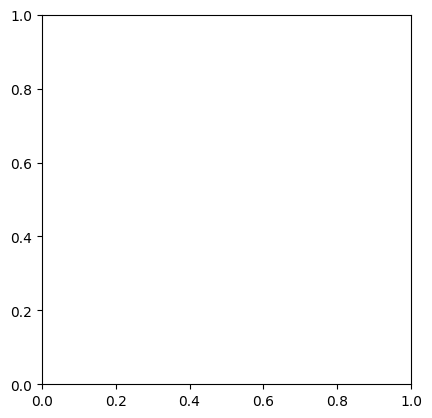

In [ ]:
'''import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow('data/chest_xray/train/PNEUMONIA/person331_virus_684.jpeg', cmap='gray')  # Display in grayscale
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()'''

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define dataset directories
train_dir = "data/chest_xray/train"
val_dir = "data/chest_xray/val"
test_dir = "data/chest_xray/test"

# Data augmentation & preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=(0.8, 1.2),  # Add brightness variation
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_data = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_data = val_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


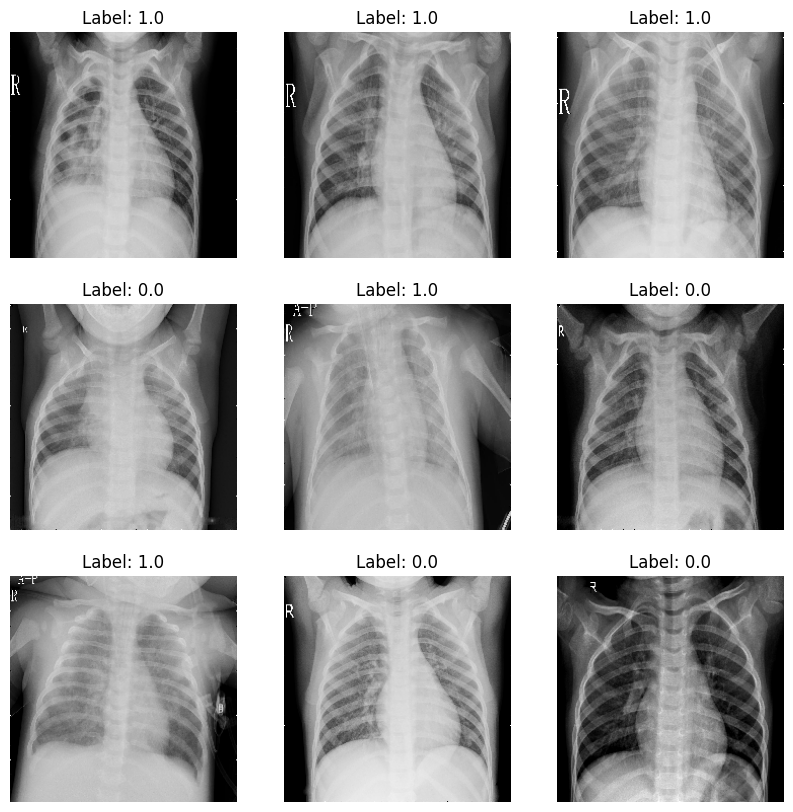

In [ ]:
# Get a batch of images from the training generator
images, labels = next(val_data)  # Get one batch

# Display the first 9 images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = images[i]  # Extract image
    ax.imshow(img)  # Display image
    ax.set_title(f"Label: {labels[i]}")
    ax.axis("off")

plt.show()

In [ ]:

plt.imshow('data/chest_xray/train/PNEUMONIA/person331_virus_684.jpeg', cmap='gray')  # Display in grayscale
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()

In [ ]:
import numpy as np

In [ ]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_data.classes), y=train_data.classes)
class_weights = dict(enumerate(class_weights))


In [ ]:
# Load Pretrained ResNet50 (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#base_model.trainable = False  # Freeze the base model layers

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create Model
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
'''model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)
'''

In [ ]:
'''test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")
'''

In [ ]:
# Unfreeze the last few layers of ResNet50
base_model.trainable = True  # Unfreeze entire model

# Freeze first 140 layers (to retain some pre-trained knowledge)
for layer in base_model.layers[:140]:
    layer.trainable = False

# Compile again with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Retrain model
history = model.fit(train_data, validation_data=val_data, epochs=20, class_weight = class_weights)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 683ms/step - accuracy: 0.7586 - loss: 0.5466 - val_accuracy: 0.5000 - val_loss: 0.9211
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 645ms/step - accuracy: 0.8850 - loss: 0.2645 - val_accuracy: 0.5625 - val_loss: 1.0616
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 642ms/step - accuracy: 0.9013 - loss: 0.2461 - val_accuracy: 0.8125 - val_loss: 0.3483
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 644ms/step - accuracy: 0.9187 - loss: 0.2057 - val_accuracy: 0.6875 - val_loss: 0.6672
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 642ms/step - accuracy: 0.9292 - loss: 0.1880 - val_accuracy: 0.7500 - val_loss: 0.3245
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 644ms/step - accuracy: 0.9319 - loss: 0.1670 - val_accuracy: 0.7500 - val_loss: 0.2969
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 637ms/step - accuracy: 0.9230 - loss: 0.1873 - val_accuracy: 0.8750 - val_loss: 0.2870
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 654ms/step - accuracy: 0.9391 -

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.8930 - loss: 0.2997
Test Accuracy: 0.8926


In [ ]:
'''
# Define image size and batch size
IMG_SIZE = (300, 300)
BATCH_SIZE = 32

# Define dataset directories
train_dir = "data/chest_xray/train"
val_dir = "data/chest_xray/val"
test_dir = "data/chest_xray/test"


# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_data = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_data = val_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_data.classes), y=train_data.classes)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

from tensorflow.keras.regularizers import l2  # Correct import
# Load EfficientNetB3 (without top layers)
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze the base model initially
base_model.trainable = True

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights
history = model.fit(train_data, validation_data=val_data, epochs=10, class_weight=class_weights)

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")
'''